# Transmissie lijnen

{numref}`Soorten_transmissielijnen` toont een overzicht van de verschillende soorten transmissielijnen. Dit omvat zowel coaxiale kabels, golfgeleiders, twisted-pair kabels als baantjes op een PCB. Schematisch zullen we elk van deze transmissielijnen voorstellen als in {numref}`t_model`. Het is belangrijk hierbij te beseffen dat bestaat uit 2 geleiders waartussen een golf zich verplaatst van de bron (generator) naar de belasting (load) (zie {numref}`E_en_H`).

In [5]:
from cursusdef import *

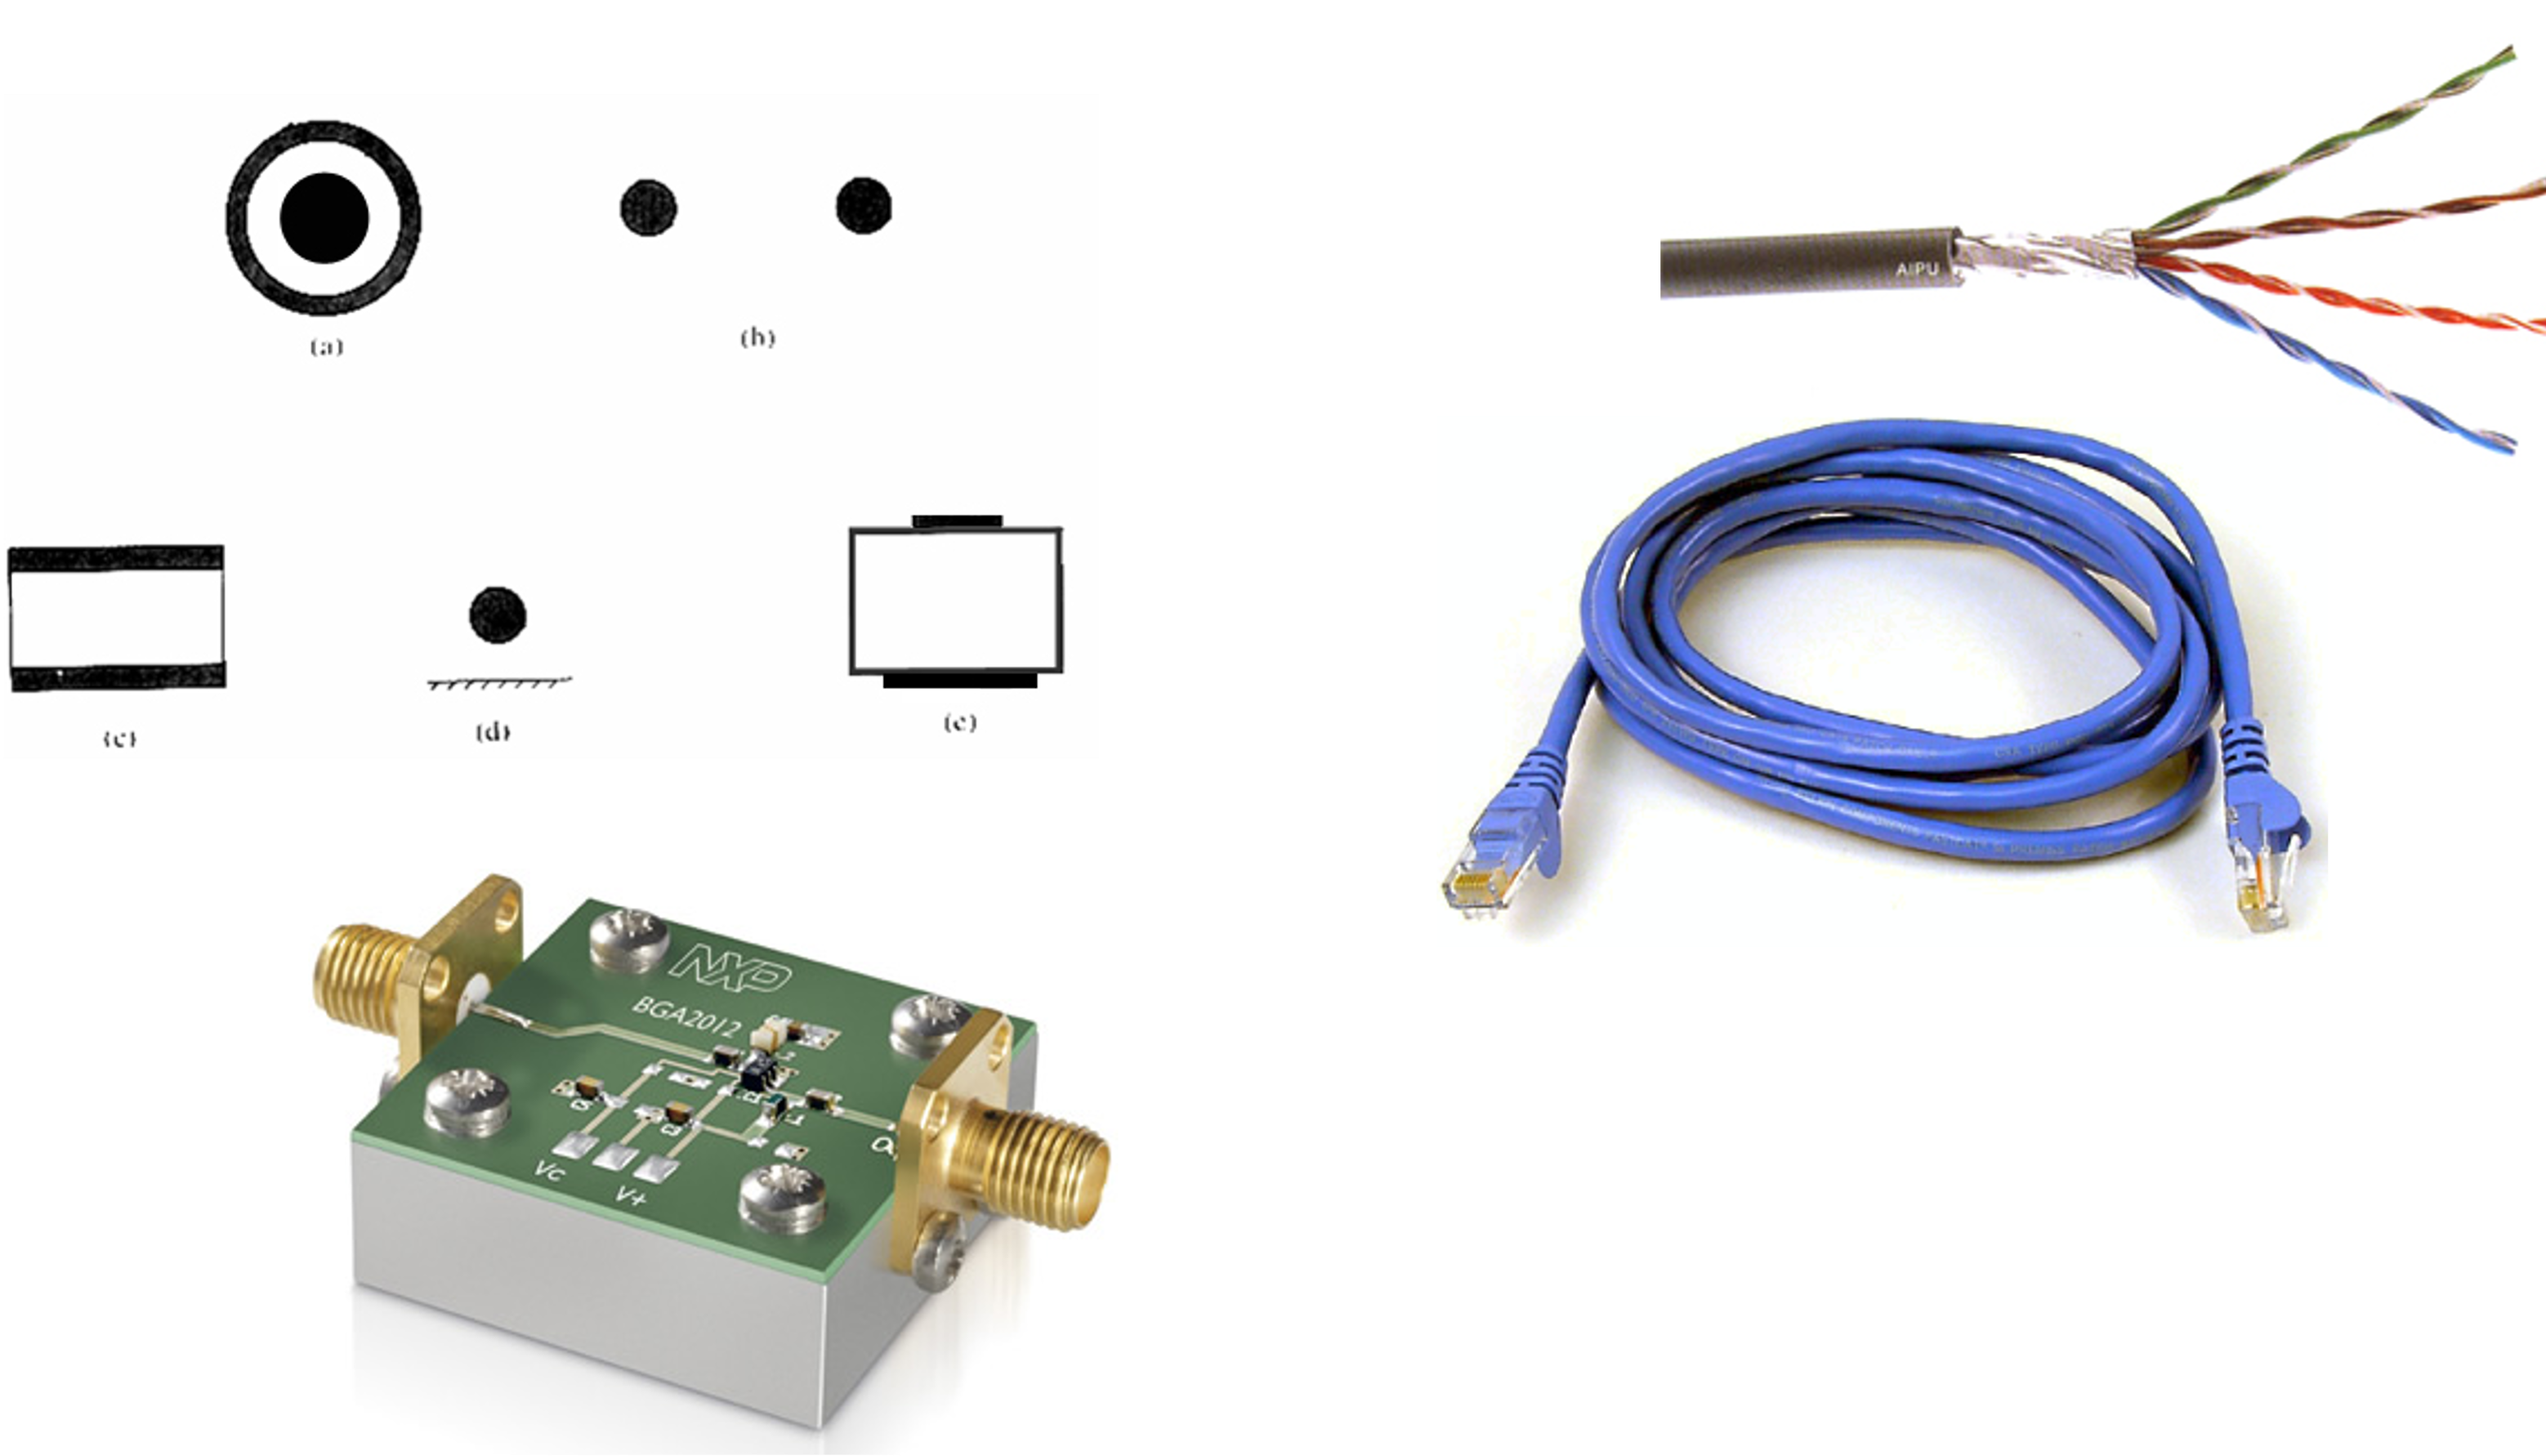

In [7]:
display.Image("./images/Soorten_transmissielijnen.png")

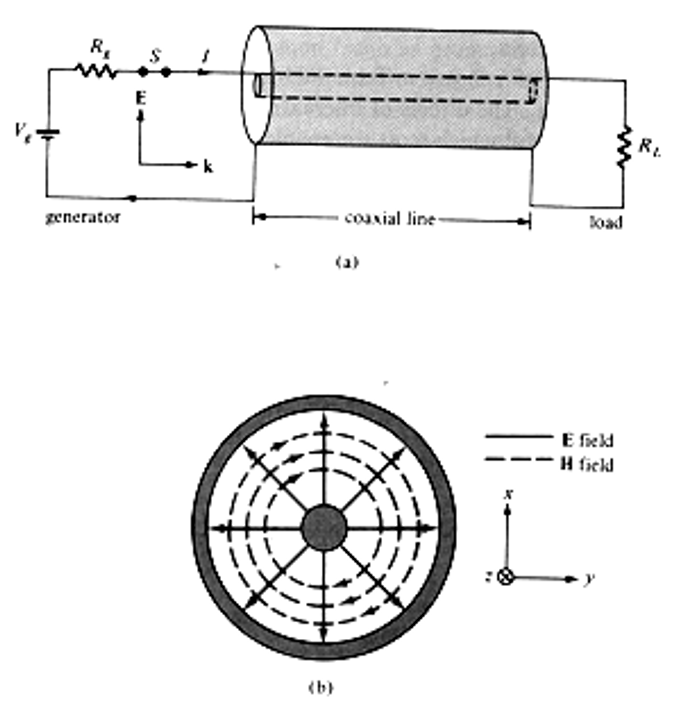

In [8]:
display.Image("./images/E_en_H.png")

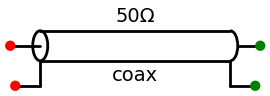

In [3]:
with schemdraw.Drawing() as d:
    d += Dot(color='r')
    d += (coax := Coax(d='right',length=5, label=r'50Ω', botlabel='coax'))
    d += Dot(color='g')
    d += Line(xy=coax.shieldend,l=0.5,d='down')
    d += Line(l=0.5,d='right')
    d += Dot(color='g')
    d += Line(xy=coax.shieldstart,l=0.5,d='down')
    d += Line(l=0.5,d='left')
    d += Dot(color='r')

## Transmissie lijn model

De golf langs een transmissielijn modelleren we in functie van zowel de plaats (z) als de tijd (t). Het elektrisch veld (E) integreren we tussen de 2 geleiders wat ons de spanning $v(z,t)$ geeft en het magnetisch veld (H) integreren we over een lus wat ons de stroom door deze lus $i(z,t)$ geeft. De vergelijkingen voor zowel $v(z,t)$ als $i(z,t)$ kunnen we bekomen door een klein stukje van de kabel met lengte $\Delta z$ te bekijken, zoals getoond in {numref}`t_model_inf`. We hebben spanningsval over de lengte $\Delta z$ omwille van de spanning over het spoel $L$ en de weerstand $R$ van het koper van de geleider, waarbij $L$ de spoelwaarde is per eenheid afstand en $R$ de weerstandwaarde per eenheid afstand. Bovendien hebben we ook een stroomverschil over de afstand $\Delta z$ omwille van het opladen van $C$ en de lek $g$, waarbij $C$ de condensatorwaarde is per eenheid afstand en $g$ de lekgeleidbaarheid per eenheid afstand. Dit resulteert in het stelsel van vergelijkingen {eq}`golf`.

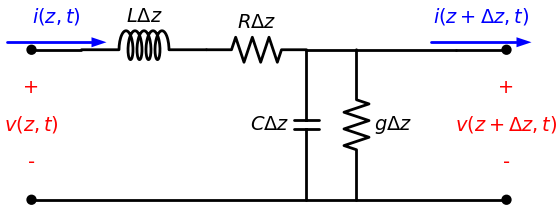

In [18]:
with schemdraw.Drawing():
    idot2=Dot()
    inline=Line(l=1,d='right')
    L = Inductor2(d='right', l=2.5,label=r'$L \Delta z$')
    R = Resistor(d='right', l=2, label=r'$R \Delta z$')
    Capacitor(d='down', label=r'$C \Delta z$')
    Line(xy=R.end,l=1,d='right')
    g = Resistor(d='down', botlabel=r'$g \Delta z$')
    Line(tox=idot2.start,d='left')
    idot1=Dot()
    Line(xy=g.end,l=3,d='right')
    odot1=Dot()
    Line(xy=g.start,l=2,d='right')
    outline=Line(l=1,d='right')
    odot2=Dot()
    CurrentLabel(color='blue').at(inline).label(r'$i(z,t)$',color='blue')
    CurrentLabel(color='blue').at(outline).label(r'$i(z + \Delta z,t)$',color='blue')
    Gap(d='up', xy= idot1.start, toy= idot2.end, color='r', label=['-',r'$v(z,t)$','+'],lblofst=0.0)
    Gap(d='up', xy= odot1.start, toy= odot2.end, color='r', label=['-',r'$v(z + \Delta z,t)$','+'],lblofst=0.0)

$$\left\{\begin{matrix}
v(z,t)- v(z+ \Delta z) &=L \Delta z \frac {\delta i}{\delta t} + R \Delta z i \\
i(z,t)- i(z+ \Delta z) &=C \Delta z \frac {\delta v}{\delta t} + g \Delta z v 
\end{matrix}\right.$$

$$\left\{\begin{matrix}
\frac{v(z,t)- v(z+ \Delta z)}{\Delta z} =L  \frac {\delta i}{\delta t} + R  i \\
\frac{i(z,t)- i(z+ \Delta z)}{\Delta z}  =C  \frac {\delta v}{\delta t} + g   v 
\end{matrix}\right.$$

z infinitisimaal klein maken:

$$\left\{\begin{matrix}
\frac{\delta v}{\delta z}  &=L  \frac {\delta i}{\delta t} + R  i \\
\frac{\delta i}{\delta z}  &=C  \frac {\delta v}{\delta t} + g  v 
\end{matrix}\right.$$

We groeperen van stroom en spanning:

$$\left\{\begin{matrix}
\frac{\delta v}{\delta z} &= (j \omega L   + R ) i \\
\frac{\delta i}{\delta z} &= (j \omega C   + g ) v 
\end{matrix}\right.$$

Beide vergelijkingen combineren geeft:

$$ \frac{\delta v}{\delta i} =   \frac{(j \omega L   + R ) i}{(j \omega C   + g )  v }$$

We groeperen stroom en spanning:

$$ \frac{v \delta v}{i\delta i} =   \frac{j \omega L   + R }{j \omega C   + g }$$

We schrijven het resultaat in de vorm van karakteristieke impedantie:

$$ Z_o^2 =   \frac{j \omega L   + R }{j \omega C   + g }$$

$$ Z_o=\sqrt{\frac{j \omega L+R}{j \omega C+g}}$$

waarbij L de inductantie per eenheid lengte is, C de capaciteit er eenheid lengte is, R de weerstand van de geleider en g de lekgeleidbaarheid van het diëlectricum.

In het beste geval is de weerstand van de geleider nul (R=0) en de lek ook nul (g=0). $Z_o$ wordt dan 

$$ Z_o \approx \sqrt{\frac{L}{C}}$$

## Coax kabel

{numref}`coaxdoorsnede` toont de doorsnede van een coax kabel met daarop de belangrijkste parameters voor het bepalen van de C per eenheid lengte en de L per eenheid lengte.

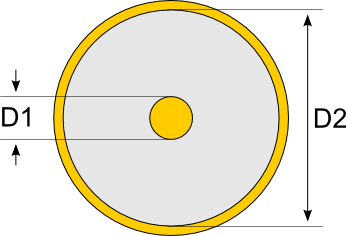

In [1]:
display.Image("./images/coax.png")

Voor een typische [coax-kabel](https://en.wikipedia.org/wiki/Coaxial_cable) met binnendiameter 1.2 mm en buiten diameter  2.8 mm bekomen we de volgende parameters:

In [34]:
def coax_parameters(D1,D2,f,e_r,sigma_c,sigma=1,mu=1,mu_c=1,display=True):
    e_0 = 8.85e-12 # F/m
    mu_0 = 4*np.pi*1e-7 # H/m
    Rs = np.sqrt(np.pi*f*mu_0*mu_c/sigma_c)
    R_p = Rs/np.pi*(1/D1 +1/D2) # Ohms/m
    L_p = mu_0*mu/(2*np.pi)*np.log(D2/D1) #H/m
    G_p = 2*np.pi*sigma/np.log(D2/D1) # S/m
    C_p = 2*np.pi*e_0*e_r/np.log(D2/D1)
    if display:
        print("R = %2.5f ohms/m" % (R_p,))
        print("L = %2.2f nH/m" % (L_p*1e9,))
        print("G = %2.3f S/m" % (G_p,))
        print("C = %2.2f pF/m" % (C_p*1e12,))
        print("Zo= %2.2f Ohm" % (np.sqrt(L_p/C_p)))
    return R_p, L_p, G_p, C_p

R_p, L_p, G_p, C_p=coax_parameters(1.2e-3,2.8e-3,1e6,1.0,5.8e7)


R = 0.09886 ohms/m
L = 169.46 nH/m
G = 7.416 S/m
C = 65.63 pF/m
Zo= 50.81 Ohm



Het verloop van de karakteristieke impedantie ziet er voor deze coax kabel uit als aangegeven in {numref}`t_Z-f`

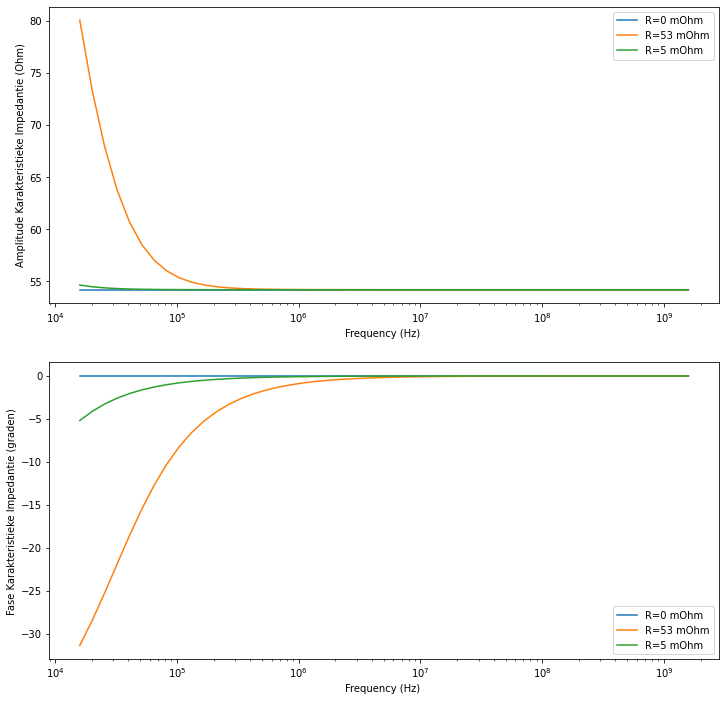

In [2]:
fig,ax = plt.subplots(2,1,figsize=(12,12))
w=np.logspace(5,10,50)
z=np.sqrt((1.0j*w*273e-9+0.0)/(1.0j*w*93e-12))
z2=np.sqrt((1.0j*w*273e-9+0.053)/(1.0j*w*93e-12))
z3=np.sqrt((1.0j*w*273e-9+0.005)/(1.0j*w*93e-12))
ax[0].plot(w/2/np.pi,abs(z), label="R=0 mOhm")
ax[0].plot(w/2/np.pi,abs(z2), label="R=53 mOhm")
ax[0].plot(w/2/np.pi,abs(z3), label="R=5 mOhm")
ax[1].plot(w/2/np.pi,np.angle(z,deg=True), label="R=0 mOhm")
ax[1].plot(w/2/np.pi,np.angle(z2,deg=True), label="R=53 mOhm")
ax[1].plot(w/2/np.pi,np.angle(z3,deg=True), label="R=5 mOhm")
ax[0].set_xscale('log')
ax[0].set_ylabel('Amplitude Karakteristieke Impedantie (Ohm)',size = 10)
ax[0].set_xlabel('Frequency (Hz) ',size = 10)
ax[1].set_xscale('log')
ax[1].set_ylabel('Fase Karakteristieke Impedantie (graden)',size = 10)
ax[1].set_xlabel('Frequency (Hz) ',size = 10);
ax[0].legend()
ax[1].legend();

Uit {numref}`t_Z-f` merken we dat bij lage frequenties deze karakteristieke impedantie in belangrijke mate verschilt van 50 Ohm. De negatieve fase geeft aan dat bij lage frequenties de lijn zich capacitief gedraagt.

## Twisted pair kabel

{numref}`twisted_pairdoorsnede` toont de doorsnede van een twisted pair kabel met daarop de belangrijkste parameters voor het bepalen van de C per eenheid lengte en de L per eenheid lengte.



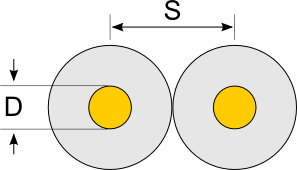

In [2]:
display.Image("./images/twisted_pair.png")

## striplijn



## Microstriplijn

De relevante parameters hier zijn de breedte van het baantje ($w$) en de  dikte van het diëlectricum ($h$). Natuurlijk speelt de relatieve Permittiviteit van het diëlectricum ($\epsilon_r$) ook mee.

In [1]:
def mstrip_anal(s,er):
    """
    Microstrip zero thickness strips design function
    
    s = w/h
    er = material relative permittivity
    
    Z0 returned
    e_eff returned

    """
    e_eff = eps_eff(s,er)
    t = (30.67/s)**0.75
    Z0 = 60/np.sqrt(e_eff) * \
         np.log((6+(2*np.pi-6)*np.exp(-t))/s + np.sqrt(1+4/s**2))
    return Z0, e_eff

def mstrip_dsgn(Z0,er):
    """
    Mircostrip zero thickness strips design function
    
    Z0 = desired characteristic impedance
    er = material relative permittivity
    
    s = w/h is returned
    e_eff returned
    
    """
    if Z0 <= (44-2*er):
        q = 60*np.pi*np.pi/(Z0*np.sqrt(er))
        s = 2/np.pi*((q-1)-np.log(2*q-1) + \
                 (er-1)/(2*er)*(np.log(q-1)+0.29-0.52/er))
        
    else:
        p = np.sqrt((er+1)/2)*Z0/60+(er-1)/(er+1)*(0.23 + 0.12/er)
        s = 8*np.exp(p)/(np.exp(2*p)-2)
    e_eff = eps_eff(s,er)
    return s, e_eff

def eps_eff(s,er):
    """
    Find microstrip e_eff given s = w/h and er
    """
    x = 0.56*((er-0.9)/(er+3))**0.05
    y = 1 + 0.02*np.log((s**4 + 3.7e-4*s**2)/(s**4+0.43)) + \
        0.05*np.log(1+1.7e-4*s**3)
    e_eff = (er+1)/2 + (er-1)/2*(1+10/s)**(-x*y)
    return e_eff

def mstrip_extra(Z0,er,f = 1e9,h = 1):
    """
    Extra parameters: L', C', beta, \lambda_g
    
    Z0 = characteristic impedance in Ohms
    er = relative permittivity
    f = operatng frequency in Hz
    h = substrate height in m
    """
    c = 3e8 # m/s
    s, e_eff = mstrip_dsgn(Z0,er)
    C_p = np.sqrt(e_eff)/(Z0*c) # F/m
    L_p = Z0**2*C_p  #H/m
    R_p = 0
    G_p = 0
    alpha = 0
    beta = 2*np.pi/c*np.sqrt(e_eff) # rad/m
    lambda_g = c/np.sqrt(e_eff)/f # m
    print('Breedte van het baantje w = %1.3e mm, Rel. perm: e_eff = %2.3f' % (s*h*1000,e_eff))
    print('Breedte van het baantje  w = %1.3e mils (vaak voorkomende PCB eenheid)' % (s*h*1000/0.0254,))
    print('-----------------------------------------------------')
    print("Weerstand per eenheid lengte: R' = 0 ohms/m")
    print("Inductantie per eenheid lengte: L' = %1.3e nH/m" % (L_p*1e9,))
    print("lek geleidbaarheid per eenheid lengte: G' = 0 S/n")
    print("Capaciteit per eenheid lengte: C' = %1.3e pF/m" % (C_p*1e12,))
    print('-----------------------------------------------------')
    print('Golflengte in de vrije ruimte: lambda = %1.3e cm' % (c/f*1e2,))
    print('Golflengte in het medium (guide): lambda_g = %1.3e cm' % (lambda_g*1e2,))

Een voorbeeld: 

We willen een 50 Ohm transmissielijn bekomen voor een 2.4 GHz signaal op een PCB waarvan de relatieve Permittiviteit van het diëlectricum $\epsilon_r$=4.6. De dikte van het diëlectricum is 1/16 inch

In [9]:
mstrip_extra(50,4.6,f= 2.4e9,h=1/16*2.54*1/100) #in*cm/in*m/cm

Breedte van het baantje w = 2.931e+00 mm, Rel. perm: e_eff = 3.460
Breedte van het baantje  w = 1.154e+02 mils (vaak voorkomende PCB eenheid)
-----------------------------------------------------
Weerstand per eenheid lengte: R' = 0 ohms/m
Inductantie per eenheid lengte: L' = 3.100e+02 nH/m
lek geleidbaarheid per eenheid lengte: G' = 0 S/n
Capaciteit per eenheid lengte: C' = 1.240e+02 pF/m
-----------------------------------------------------
Golflengte in de vrije ruimte: lambda = 1.250e+01 cm
Golflengte in het medium (guide): lambda_g = 6.720e+00 cm


In [7]:
print('Quart golflengte bij 2.4 GHz  = %1.3f cm' % (6.72/4,))

Quart golflengte bij 2.4 GHz  = 1.680 cm


In [5]:
mstrip_extra(64,4.6,f= 0.5e9,h=1/16*2.54*1/100) #in*cm/in*m/cm

Breedte van het baantje w = 1.884e+00 mm, Rel. perm: e_eff = 3.338
Breedte van het baantje  w = 7.418e+01 mils (vaak voorkomende PCB eenheid)
-----------------------------------------------------
Weerstand per eenheid lengte: R' = 0 ohms/m
Inductantie per eenheid lengte: L' = 3.898e+02 nH/m
lek geleidbaarheid per eenheid lengte: G' = 0 S/n
Capaciteit per eenheid lengte: C' = 9.516e+01 pF/m
-----------------------------------------------------
Golflengte in de vrije ruimte: lambda = 6.000e+01 cm
Golflengte in het medium (guide): lambda_g = 3.284e+01 cm


## Microstrip Analyse Plots
We vergelijken 3 types: Micro-fiber PTFE, FR4, en Ceramisch-gevulde PTFE voor een aantal waardes van $w/h$.

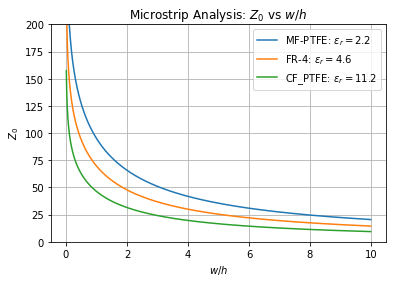

In [24]:
s = np.arange(0.01,10,.01)
Z0 = np.zeros_like(s)
e_eff = np.zeros_like(s)
er = (2.2,4.6,11.2)
for m in range(3):
    for k,sk in enumerate(s):
        Z0[k],e_eff[k] = mstrip_anal(sk,er[m])
    plt.plot(s,Z0)
plt.ylim([0,200])
plt.xlabel(r'$w/h$')
plt.ylabel(r'$Z_0$')
plt.title(r'Microstrip Analysis: $Z_0$ vs $w/h$')
plt.legend((r'MF-PTFE: $\epsilon_r = 2.2$',r'FR-4: $\epsilon_r=4.6$',
        r'CF_PTFE: $\epsilon_r=11.2$'),loc='best')
plt.grid();

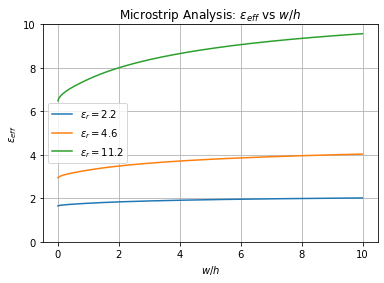

In [12]:
s = np.arange(0.01,10,.01)
Z0 = np.zeros_like(s)
e_eff = np.zeros_like(s)
er = (2.2,4.6,11.2)
for m in range(3):
    for k,sk in enumerate(s):
        Z0[k],e_eff[k] = mstrip_anal(sk,er[m])
    plt.plot(s,e_eff)
plt.ylim([0,10])
plt.xlabel(r'$w/h$')
plt.ylabel(r'$\epsilon_{eff}$')
plt.title(r'Microstrip Analyse: $\epsilon_{eff}$ vs $w/h$')
plt.legend((r'$\epsilon_r = 2.2$',r'$\epsilon_r=4.6$',
        r'$\epsilon_r=11.2$'),loc='best')
plt.grid();

## Microstrip Design Plots

Voor het design doen we eigenlijk het omgekeerde van de analyse: we vertrekken van een gevraagde $Z_o$ en we rekenen uit wat de $w$ en $h$ moeten zijn om dit te bekomen.
We vergelijken 3 types: Micro-fiber PTFE, FR4, en Ceramisch-gevulde PTFE voor een aantal waardes van $w/h$.

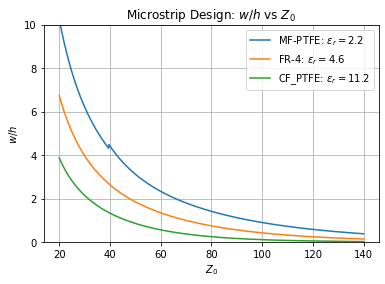

In [18]:
Z0 = np.arange(20,140,.1)
s = np.zeros_like(Z0)
e_eff = np.zeros_like(Z0)
er = (2.2,4.6,11.2)
for m in range(3):
    for k,Z0k in enumerate(Z0):
        s[k],e_eff[k] = mstrip_dsgn(Z0k,er[m])
    plt.plot(Z0,s)
plt.ylim([0,10])
plt.xlabel(r'$Z_0$')
plt.ylabel(r'$w/h$')
plt.title(r'Microstrip Design: $w/h$ vs $Z_0$')
plt.legend((r'MF-PTFE: $\epsilon_r = 2.2$',r'FR-4: $\epsilon_r=4.6$',
        r'CF_PTFE: $\epsilon_r=11.2$'),loc='best')
plt.grid();

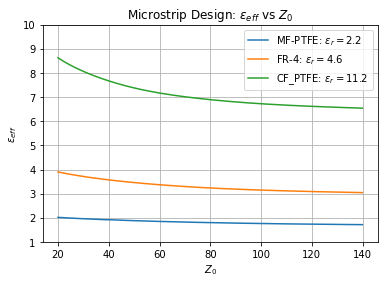

In [21]:
for m in range(3):
    for k,Z0k in enumerate(Z0):
        s[k],e_eff[k] = mstrip_dsgn(Z0k,er[m])
    plt.plot(Z0,e_eff)
plt.ylim([1,10])
plt.xlabel(r'$Z_0$')
plt.ylabel(r'$\epsilon_{eff}$')
plt.title(r'Microstrip Design: $\epsilon_{eff}$ vs $Z_0$')
plt.legend((r'MF-PTFE: $\epsilon_r = 2.2$',r'FR-4: $\epsilon_r=4.6$',
        r'CF_PTFE: $\epsilon_r=11.2$'),loc='best')
plt.grid();

# Andere transmissie lijnconfiguraties



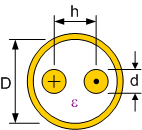

In [2]:
display.Image("./images/balanced-shielded-line.gif")

## Twee geleiders in een onbeperkt medium

{numref}`2air` toont de doorsnede van 2 gelijke geleiders met diameter $d$ op een afstand $D$ van elkaar verwijderd. De karakteristieke impedantie $Z_0$ van deze topologie is:

$$Z_0= \frac{1}{\pi}\sqrt{\frac{\mu}{\epsilon}}\cosh^{-1}\left(\frac{D}{d}\right) 
\approx \frac{119.92}{\sqrt{\epsilon}} \ln\left(\frac{2D}{d}\right)
\approx \frac{276}{\sqrt{\epsilon}} \log_{10}\left(\frac{2D}{d}\right)$$

Voor de geldigheid van deze formule is het essentieel dat beide geleiders een gelijke en tegengestelde stroom geleiden.

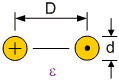

In [18]:
display.Image("./images/two-conductors-in-air.gif")

Het is ook mogelijk dat beide geleiders niet dezelfde diameter hebben. In {numref}`z_ongelijk` wordt de doorsnede geschetst voor de diameters $d_1$ en $d_2$. 

De karakteristieke impedantie $Z_0$ van deze topologie is:

$$Z_0= \frac{1}{2\pi}\sqrt{\frac{\mu}{\epsilon}}\cosh^{-1}\left(\frac{1}{2}\left(\frac{4 D^2}{d_1 d_2} -\frac{d_1}{d_2}-\frac{d_2}{d_1}\right)\right) $$


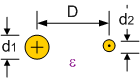

In [9]:
display.Image("./images/balanced-conductors-unequal-diameters.gif")

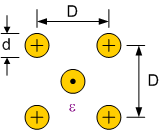

In [4]:
display.Image("./images/5-wire-array.gif")

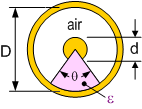

In [5]:
display.Image("./images/air-coax-supporting-dielectric-wedge.gif")

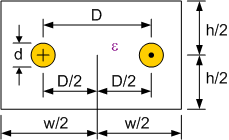

In [6]:
display.Image("./images/balanced-2-wire-in-rectangular-enclosure.gif")

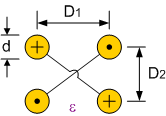

In [7]:
display.Image("./images/balanced-4-wire-conductors.gif")

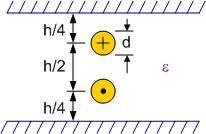

In [8]:
display.Image("./images/balanced-conductors-between-ground-planes.gif")

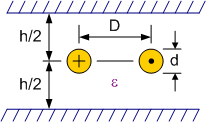

In [10]:
display.Image("./images/balanced-parallel-conductors-between-ground-planes.gif")

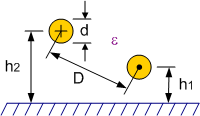

In [12]:
display.Image("./images/parallel-conductors-above-ground-unequal-height.gif")

# Een geleider boven een grondvlak

{numref}`1gel` toont de configuratie van een geleider boven een grondvlak. Hierbij is het vanzelfsprekend dat de terugstroom door het grondvlak loopt. Daarom wordt de waarde van de karakteristieke impedantie $Z_0$ bekomen tussen deze geleider en het grondvlak.

$$Z_0= \frac{138}{\sqrt{ε}} \log_{10}\left(\frac{4h}{d}\right) $$ 

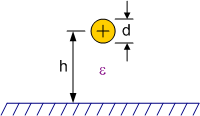

In [14]:
display.Image("./images/single-conductor-above-ground.gif")

## Twee geleiders boven een grondvlak

Hierbij is het belangrijk dat we het verschil beschouwen tussen de differentiële karakteristieke impedantie (zie {numref}`dif2gnd`) en de common mode karakteristieke impedantie (zie {numref}`com2gnd`).

Wanneer d << D en d << h worden de vergelijkingen:

$$Z_{0_{diff}}= \frac{276}{\sqrt{ε}}  \log_{10}\left(\frac{2D}{d}\frac{1}{\sqrt{1+\left(\frac{D}{2h}\right)^2}}\right) $$

$$Z_{0_{common}}= \frac{69}{\sqrt{ε}} \log_{10}\left(\frac{4h}{d}\frac{1}{\sqrt{1+\left(\frac{2h}{D}\right)^2}}\right) $$

We zien ook dat als $D$ zeer groot wordt, de waarde van $Z_{0_{common}}$ de helft wordt van de waarde van een enkelvoudige geleider boven een grondvlak, met andere woorden: voor grote D kunnen we beide geleiders in parallel beschouwen.

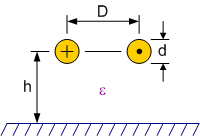

In [11]:
display.Image("./images/balanced-parallel-conductors-near-ground.gif")

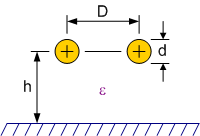

In [13]:
display.Image("./images/parallel-conductors-near-ground.gif")

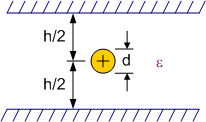

In [15]:
display.Image("./images/single-conductor-between-ground-planes.gif")

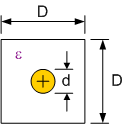

In [16]:
display.Image("./images/single-conductor-square-enclosure.gif")

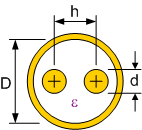

In [17]:
display.Image("./images/twin-conductors-inside-shield.gif")